In [15]:
import sys
sys.path.append('../src')

import data_exploration

# Caminho para o arquivo CSV
file_path = '../data/new_logs_labels.csv'

# Chamar a função para carregar e inspecionar os dados
df = data_exploration.load_data(file_path)
# data_exploration.inspect_data(df)



In [16]:
data_exploration.create_metadata_file(df, '../data/metadata.csv')

Metadados salvos em data/metadata.csv


In [17]:
import importlib
importlib.reload(data_exploration)

<module 'data_exploration' from '/Users/patricia/Documents/code/python/behavior-detection/notebooks/../src/data_exploration.py'>

In [18]:
X, y = data_exploration.split_features_and_target(df)

In [19]:
# Exibe os labels das colunas de X e y
print(X.columns)
print(y.columns)

Index(['id_log', 'aluno', 'grupo', 'num_dia', 'num_log', 'log_type',
       'ultimo_passo_correto', 'verificado_com_mouse',
       'verificado_com_teclado', 'idle_time_acumulado',
       ...
       'misc_OI_Mt_Plus_Sb_total', 'misc_OI_Dv_Plus_Sb_total',
       'misc_EqSec_Distrib_MtTerm_total', 'misc_OI_Mt_Minus_Mt_Plus_total',
       'misc_OI_Mt_Minus_Mt_Minus_total', 'misc_OI_Dv_Plus_Ad_total',
       'misc_EqPrim_Mt_Inc_total', 'misc_EqPrim_Dv_Inc_total',
       'misc_OI_Dv_Minus_Dv_Minus_total',
       'misc_EqSec_OpFrac_MMC_MtNumerador_total'],
      dtype='object', length=336)
Index(['comportamento_on_task', 'comportamento_on_task_conversation',
       'comportamento_on_task_out', 'comportamento_off_task',
       'comportamento_on_system', 'comportamento_indefinido',
       'ultimo_comportamento_indefinido'],
      dtype='object')


In [20]:
data_exploration.inspect_data(X)

Primeiras linhas do DataFrame:
   id_log  aluno  grupo  num_dia  num_log           log_type  \
0    8224      1      2        1        1  step_verification   
1  527786      1      2        1        2          user_idle   
2  527787      1      2        1        3          user_idle   
3  527788      1      2        1        4          user_idle   
4  527789      1      2        1        5          user_idle   

   ultimo_passo_correto  verificado_com_mouse  verificado_com_teclado  \
0                     0                     0                       1   
1                     1                     0                       0   
2                     0                     0                       0   
3                     0                     0                       0   
4                     0                     0                       0   

   idle_time_acumulado  ...  misc_OI_Mt_Plus_Sb_total  \
0                    0  ...                         0   
1                    2  ...    

In [21]:
data_exploration.inspect_data(y)

Primeiras linhas do DataFrame:
   comportamento_on_task  comportamento_on_task_conversation  \
0                      1                                   0   
1                      1                                   0   
2                      1                                   0   
3                      1                                   0   
4                      1                                   0   

   comportamento_on_task_out  comportamento_off_task  comportamento_on_system  \
0                          0                       0                        0   
1                          0                       0                        0   
2                          0                       0                        0   
3                          0                       0                        0   
4                          0                       0                        0   

   comportamento_indefinido  ultimo_comportamento_indefinido  
0                         0       

In [22]:
# Cria um novo dataframe que contém y concatenado com X
new_df = data_exploration.concat_features_and_target(X, y)



In [23]:
# Pegar a primeira instância de cada aluno
first_instances = new_df.groupby('aluno').first().reset_index()

# Selecionar apenas as colunas desejadas
first_instances = first_instances[y.columns]

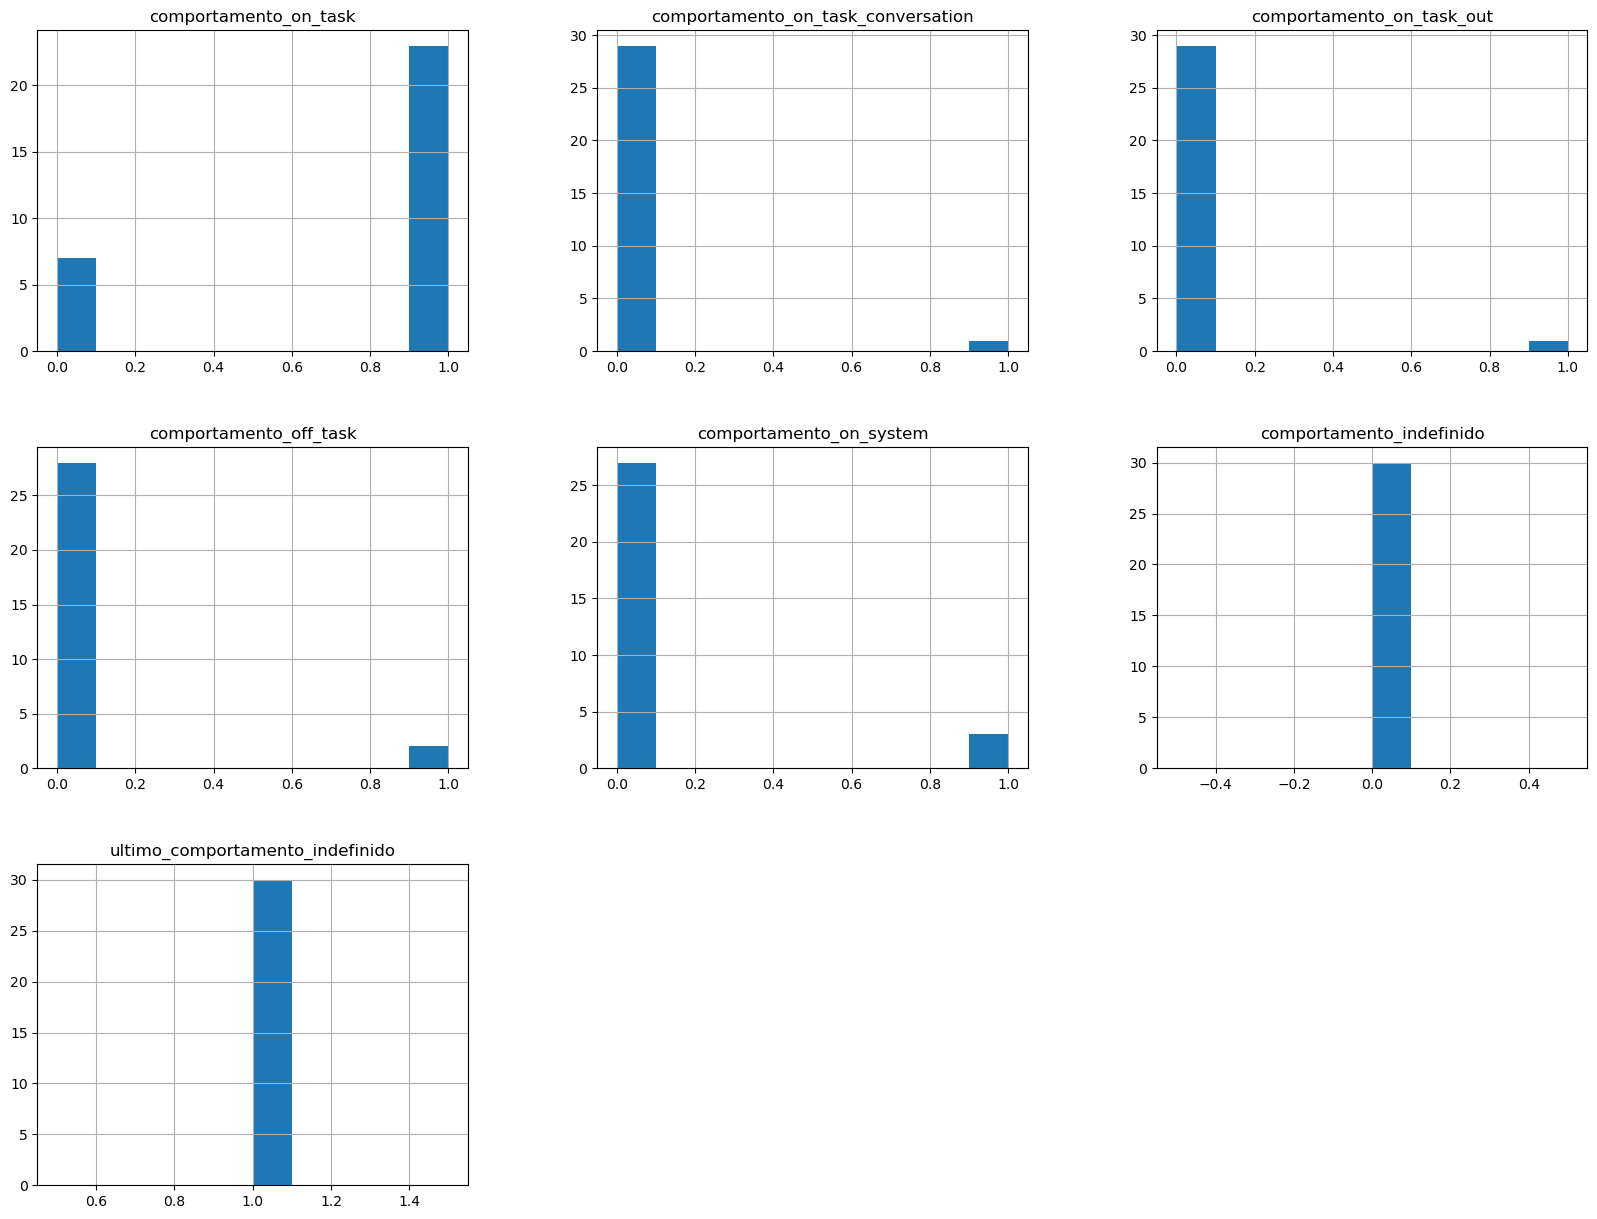

In [24]:
data_exploration.vis_histogram(first_instances, 10)